In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1=pd.read_csv('hr_employee_churn_data.csv')
df1.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [5]:
df1.shape

(14999, 10)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


# Feature engineering

In [7]:
df2 = df1.copy()
df2.drop(['empid'], axis=1, inplace=True)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


In [8]:
df2.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [9]:
df2['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [10]:
df2['satisfaction_level'].fillna(df2['satisfaction_level'].mean(), inplace=True)
df2.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [11]:
df2['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [12]:
salary_dummies = pd.get_dummies(df2['salary'],drop_first=True)
salary_dummies

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
14994,1,0
14995,1,0
14996,1,0
14997,1,0


In [13]:
df2=pd.concat([df2,salary_dummies],axis=1)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,1,0
1,0.80,0.86,5,262,6,0,0,medium,1,0,1
2,0.11,0.88,7,272,4,0,0,medium,1,0,1
3,0.72,0.87,5,223,5,0,0,low,1,1,0
4,0.37,0.52,2,159,3,0,0,low,1,1,0


In [14]:
df2.drop(['salary'],axis=1,inplace=True)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,1,0
1,0.80,0.86,5,262,6,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,1,1,0
4,0.37,0.52,2,159,3,0,0,1,1,0


**Train test split**

In [15]:
x = df2.drop(labels='left', axis=1)
y = df2['left']

In [16]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,low,medium
0,0.38,0.53,2,157,3,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

In [19]:
X_train.shape

(11999, 9)

In [20]:
X_test.shape

(3000, 9)

# Model selection

Models: Random Forest, XGBoost

In [21]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [22]:
!pip install searchgrid

Defaulting to user installation because normal site-packages is not writeable
  Using cached searchgrid-0.2.0-py3-none-any.whl


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [23]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10,50,100,150],
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2,4,1),
            'max_features':['auto','log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
            'learning_rate': [0.5,0.1,0.01,0.001],
            'max_depth': [3,5,10,20],
            'n_estimators': [10,50,100,200]
        }
    }
}

In [25]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [26]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9215297543625652,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.9909995109480938,
  'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}}]

**XGBClassifier performs well with a score of 0.99**

# Model building

In [27]:
model = XGBClassifier(objectives='binary:logistic', learning_rate=0.1, max_depth=20, n_estimators=100)
model.fit(X_train, y_train)

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [22:15:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "objectives" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objectives='binary:logistic', ...)

In [28]:
model.score(X_test,y_test)

0.9903333333333333

Model performed at an accuracy of 99% in test data.

**Confusion matrix**

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
con_mat = confusion_matrix(y_test, model.predict(X_test))
con_mat

array([[2291,    8],
       [  21,  680]], dtype=int64)

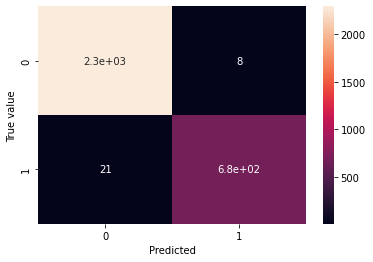

In [31]:
sns.heatmap(con_mat, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True value")
plt.show()

In [35]:
import pickle


In [37]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)